# Исследование для сервиса аренды самокатов.
Необходимо проанализировать данные популярного сервиса аренды самокатов GoFast. 
Есть данные о некоторых пользователях из нескольких городов, а также об их поездках и типе оплаты в трех файлах. 
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

без подписки:
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;

с подпиской Ultra:
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

Требуется проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.
# План исследования
1. Загрузка и знакомство с данными
2. Предобработка данных
2. Исследовательский анализ данных
3. Объединение данных
4. Расчет выручки
5. Проверка гипотез
6. Распределения
7. Общий вывод.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Загрузка-данных" data-toc-modified-id="Шаг-1.-Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг 1. Загрузка данных</a></span></li><li><span><a href="#Шаг-2.-Предобработка-данных" data-toc-modified-id="Шаг-2.-Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг 2. Предобработка данных</a></span></li><li><span><a href="#Шаг-3.-Исследовательский-анализ-данных" data-toc-modified-id="Шаг-3.-Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг 3. Исследовательский анализ данных</a></span></li><li><span><a href="#Шаг-4.-Объединение-данных" data-toc-modified-id="Шаг-4.-Объединение-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг 4. Объединение данных</a></span></li><li><span><a href="#Шаг-5.-Подсчёт-выручки" data-toc-modified-id="Шаг-5.-Подсчёт-выручки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Шаг 5. Подсчёт выручки</a></span></li><li><span><a href="#Шаг-6.-Проверка-гипотез" data-toc-modified-id="Шаг-6.-Проверка-гипотез-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Шаг 6. Проверка гипотез</a></span></li><li><span><a href="#Шаг-7.-Распределения" data-toc-modified-id="Шаг-7.-Распределения-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Шаг 7. Распределения</a></span>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
from scipy.stats import binom
from scipy.stats import binom, norm
from math import sqrt

## Шаг 1. Загрузка данных

In [2]:
try:
    users = pd.read_csv('/datasets/users_go.csv')
    rides = pd.read_csv('/datasets/rides_go.csv')
    subs = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    users = pd.read_csv('users_go.csv')
    rides = pd.read_csv('rides_go.csv')
    subs = pd.read_csv('subscriptions_go.csv')

display(users.info())
display(rides.info())
subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


*Итого: 1565 пользователей, 18068 поездок и 2 типа подписки. Пропусков в данных нет.
В таблице users колонка date имеет формат object, а не date*

In [3]:
display(users.head())
display(rides.head())
subs.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


## Шаг 2. Предобработка данных

In [4]:
#Проверяем количесвто строк-будликатов в таблицах. В subs их очевидно нет
print('Число дубликатов в users:', users.duplicated().sum())
print('Число дубликатов в rides:', rides.duplicated().sum())

Число дубликатов в users: 31
Число дубликатов в rides: 0


In [5]:
#Меняем формат колонки с датой поездки
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [6]:
#добавляем колонку с месяцем поездки
rides['month'] = pd.DatetimeIndex(rides['date']).month
rides['month'].unique()

array([ 1,  4,  8, 10, 11, 12,  3,  6,  7,  2,  5,  9], dtype=int64)

In [7]:
#удаляем дубликаты
users = users.drop_duplicates().reset_index(drop='True')
len(users) #проверяем количество строк

1534

*Вывод: Поменяли формат данных в столбце date в rides и создали новую колонку с номером месяца поездки. Удалили дубликаты в users, осталость 1534 записи.*

## Шаг 3. Исследовательский анализ данных

3.1 Частота встречаемости городов

In [8]:
#Считаем количество пользователей в городах с помощью сводной таблицы
city_pivot = users.pivot_table(index='city', values='user_id', aggfunc='count')
city_pivot_sorted = city_pivot.sort_values(by='user_id', ascending=False)
city_pivot_sorted.columns = ['users']
city_pivot_sorted

,users
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


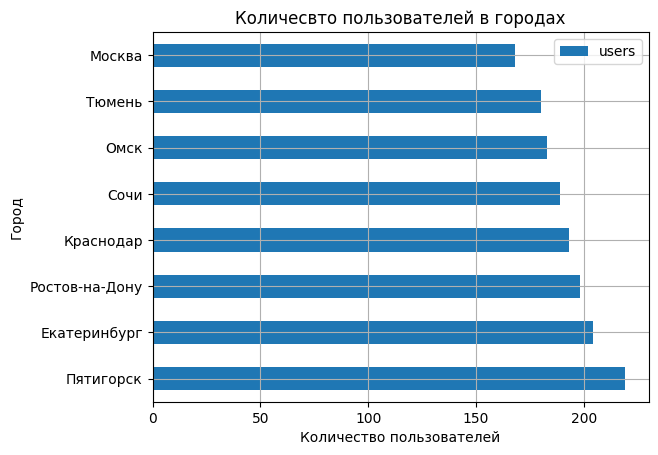

In [9]:
city_pivot_sorted.plot(kind='barh',
                       grid=True,
                       title='Количесвто пользователей в городах');
plt.ylabel('Город')
plt.xlabel('Количество пользователей');

Из графика видно, что количество пользователей сервиса больше всего в Пятигорске и Екатеринбурге, а меньше всего в Москве, где высокая конкуренция среди подобных сервисов.

3.2 Доля пользователей с подпиской и без подписки

In [10]:
num_ultra = len(users[users['subscription_type'] == "ultra"])
num_free = len(users[users['subscription_type'] == "free"])
print('Количество пользователей с подпиской ultra:', num_ultra)
print('Количество пользователей без подписки:', num_free)

Количество пользователей с подпиской ultra: 699
Количество пользователей без подписки: 835


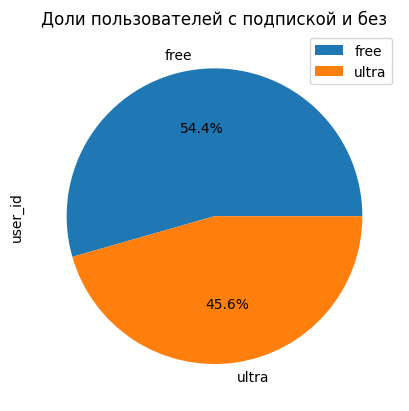

In [11]:
subs_pivot = users.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
subs_pivot.plot(kind='pie', y='user_id', autopct='%1.1f%%')
plt.title('Доли пользователей с подпиской и без');

Пользователей без платной подписки на 8,8% больше

3.3 Возраст пользователей

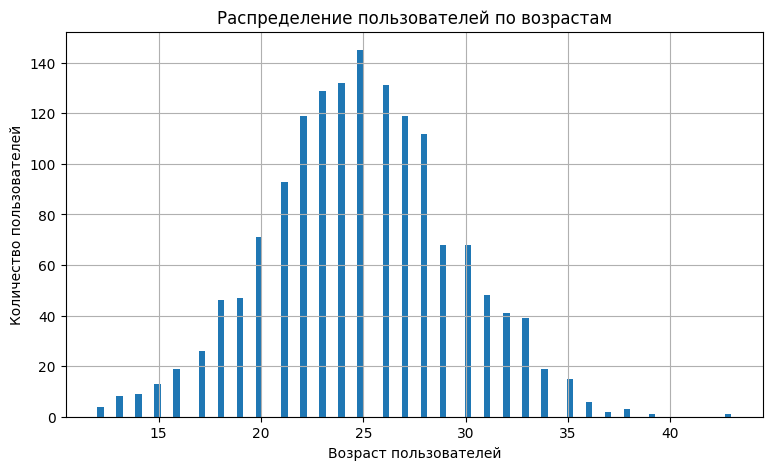

In [12]:
#Строим гистограмму распределения пользователей по возрастам
users.hist(column='age',
           bins = 100,
           grid=True,
           figsize = (9,5))
plt.ylabel('Количество пользователей')
plt.xlabel('Возраст пользователей')
plt.title('Распределение пользователей по возрастам');

In [13]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Распределение пользователей по возрасту имеет нормальный характер, медиана почти равна среднему значению 25 лет, это же значение является модой. Самому взрослому пользователю всего 43 года, а самому юному - 12 лет.

3.4 - 3.5 Расстояние, которое пользователь преодолел за одну поездку и продолжительность поездок

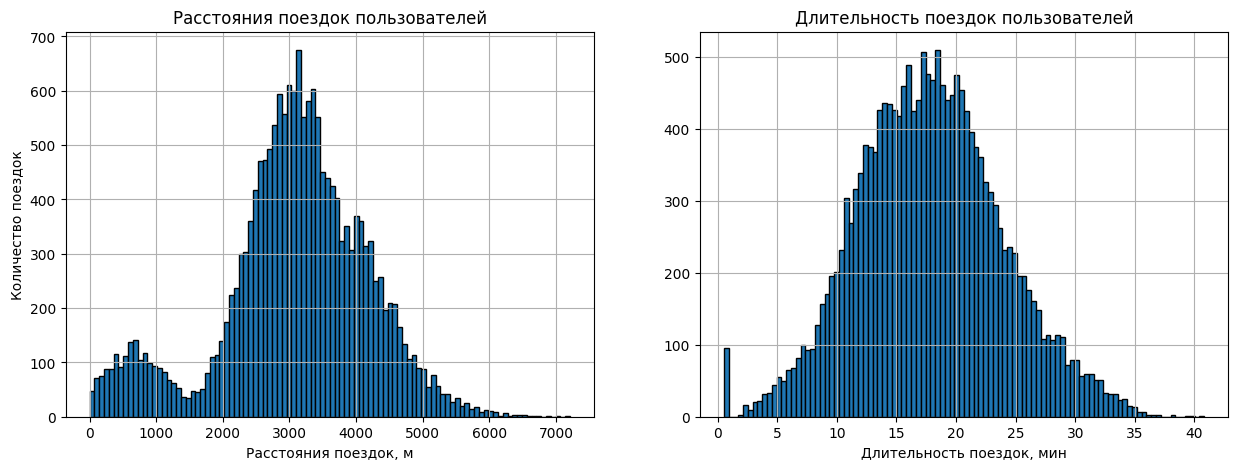

In [14]:
# Строим гистограммы распределения расстояний и длительности поездок
distance = rides['distance']
duration = rides['duration']
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

ax1.hist(distance, bins = 100, edgecolor='black');
ax1.set_title('Расстояния поездок пользователей')
ax1.set_xlabel('Расстояния поездок, м')
ax1.grid(True)
ax1.set_ylabel('Количество поездок');

ax2.hist(duration, bins = 100, edgecolor='black');
ax2.set_title("Длительность поездок пользователей")
ax2.set_xlabel('Длительность поездок, мин')
ax2.grid(True);

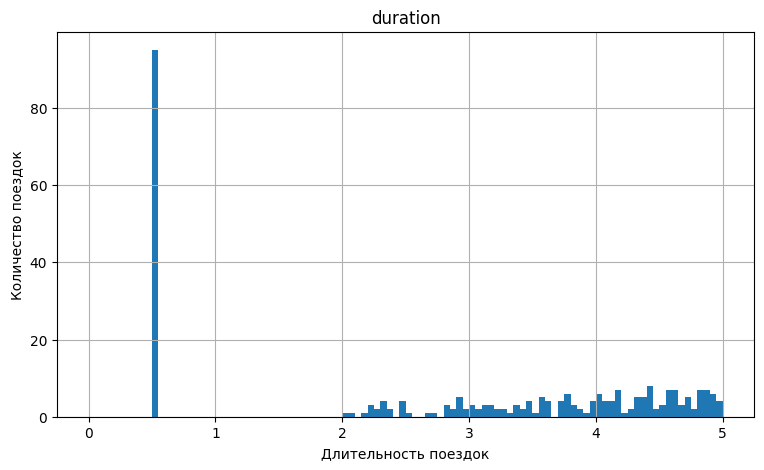

In [15]:
# Проверяем выброс рядом с 0.
rides.hist(column='duration',
           bins = 100,
           grid=True, 
           figsize = (9,5),
           range=(0,5));
plt.ylabel('Количество поездок')
plt.xlabel('Длительность поездок');

In [16]:
#Около 90 значений длительности поездки 0,5 - явный сбой.
rides.loc[rides['duration'] == 0.5].head()

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2


In [17]:
rides[['distance', 'duration']].describe()

,distance,duration
count,18068.000000,18068.000000
mean,3070.659976,17.805011
std,1116.831209,6.091051
min,0.855683,0.500000
25%,2543.226360,13.597563
50%,3133.609994,17.678395
75%,3776.222735,21.724800
max,7211.007745,40.823963


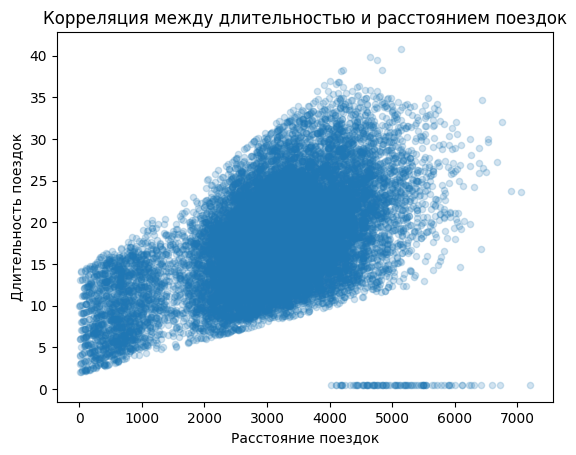

In [40]:
#Проверим как связаны расстояния поездок и их длительность
rides.plot(x='distance', y='duration', kind='scatter', alpha=0.2);
plt.ylabel('Длительность поездок')
plt.xlabel('Расстояние поездок')
plt.title('Корреляция между длительностью и расстоянием поездок');

*Вывод: Пользователей без платной подписки на 8,8% больше чем без. Самый популярный возраст пользователей - 25 лет. Самому взрослому пользователю всего 43 года, а самому юному - 12 лет. Длительность поездок пользователей распределена нормально. Судя по гистограме расстояний можно выделить категорию коротких поездок до 1,5 км, возможно, пробных, большая же часть поездок от 2,5 км до 4 км. Среднее расстояние и медиана в районе 3,1 км,а среднее время поездки 17 минут. Дольше 35 минут почти не катаются. Обнаружены аномальные значения длительности поездки, которые проверим после объединения данных, возможно это сбой одного самоката, определить его мы не можем, но можно проверить в одном это городе происходит или нет. Можно также заметить по диаграмме рассеяния, что эти сбои происходят только на длительных поездках от 4 км. Количество этих данных незначительно, 95 случаев из 18 тысяч, можно удалить. Также довольно подозрительны поездки с очень маленькой дистанцией. Они могут говорить о проблемах с самокатами (поломка или разряжен). Их также проверим чуть позже.*

## Шаг 4. Объединение данных

In [19]:
#Сначала объединяем пользователей с поездками в одну таблицу по общей колонке user_id
rides_users = rides.merge(users, on='user_id', how='left')
rides_users.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra


In [20]:
#Далее объединяем полученную таблицу с данными о подписках по общей колонке subscription_type
data_un = rides_users.merge(subs, on='subscription_type', how='left')
data_un.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [21]:
#Проверяем итоговый датафрейм
data_un.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  int64         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


Количество строк осталось тем же. Пропусков нет.

In [22]:
#Проверяем записи с аномальными значениями
rides_users.loc[rides_users['duration'] == 0.5].head()

,user_id,distance,duration,date,month,name,age,city,subscription_type
6531,701,4196.445201,0.5,2021-08-31,8,Иван,31,Екатеринбург,free
6570,704,4830.824371,0.5,2021-10-14,10,Мирон,29,Ростов-на-Дону,free
6680,712,4684.004397,0.5,2021-03-04,3,Дарья,28,Москва,free
6695,713,5215.642710,0.5,2021-02-25,2,Святослав,30,Краснодар,free
6768,718,5197.436649,0.5,2021-02-11,2,Владислава,31,Москва,free


Версия, что некорректные данные относятся к одному самокату не подтвердилась. Сбои происходят в разных городах, при этом расстояние поездки нормальное. Необходимо сообщить технической слубе об этих сбоях. Данные строки удаляем.

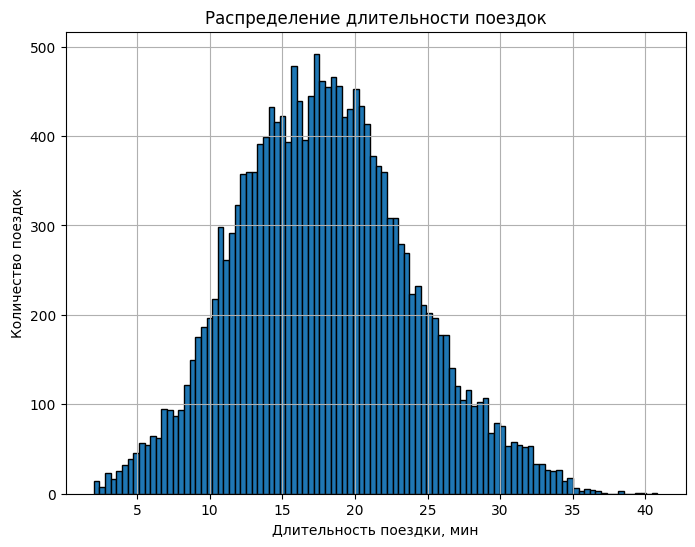

In [23]:
#Перезаписываем датафрейм без аномальных значений и проверяем
data_un = data_un[data_un['duration'] != 0.5]
data_un.hist(column='duration', 
             bins = 100, 
             grid=True, 
             edgecolor='black', 
             figsize = (8,6))
plt.title('Распределение длительности поездок')
plt.ylabel('Количество поездок')
plt.xlabel('Длительность поездки, мин');

In [24]:
data_un.reset_index(drop= True , inplace= True )
data_un.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17973 entries, 0 to 17972
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17973 non-null  int64         
 1   distance           17973 non-null  float64       
 2   duration           17973 non-null  float64       
 3   date               17973 non-null  datetime64[ns]
 4   month              17973 non-null  int64         
 5   name               17973 non-null  object        
 6   age                17973 non-null  int64         
 7   city               17973 non-null  object        
 8   subscription_type  17973 non-null  object        
 9   minute_price       17973 non-null  int64         
 10  start_ride_price   17973 non-null  int64         
 11  subscription_fee   17973 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.6+ MB


In [25]:
#Проверяем очень короткие поездки
data_un[data_un['distance'] <= 1500].head(10)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
9,1,748.690645,15.041884,2021-11-22,11,Кира,22,Тюмень,ultra,6,0,199
20,2,923.007439,6.914760,2021-08-03,8,Станислав,31,Омск,ultra,6,0,199
47,4,724.559572,11.811399,2021-11-14,11,Константин,26,Ростов-на-Дону,ultra,6,0,199
91,9,979.657684,17.521497,2021-03-08,3,Ян,21,Пятигорск,ultra,6,0,199
100,10,680.952663,5.150377,2021-02-21,2,Валерий,18,Екатеринбург,ultra,6,0,199
105,10,1409.589386,15.020549,2021-07-02,7,Валерий,18,Екатеринбург,ultra,6,0,199
121,12,1236.815996,9.710448,2021-08-07,8,Марк,27,Тюмень,ultra,6,0,199
132,13,1158.851148,7.345692,2021-10-26,10,Ева,24,Краснодар,ultra,6,0,199
149,15,634.891669,15.809350,2021-04-05,4,Валерия,24,Тюмень,ultra,6,0,199


In [26]:
data_un.loc[data_un['distance'] <= 500, 'user_id'].count()/len(data_un)

0.03126912591108886

*Почти 3% поездок довольно короткие, меньше 500 метров, некоторые из них при этом нормальные по времени. Можно предположить проблему с самокатом (поломка или разряжен) или первую пробную поезду пользователя. В любом случае, выявить какую-то четкую закономерность в этих строках не удалось.*

In [27]:
#Cоздаем отдельный датафрейм с пользователями по подписке free
data_free = data_un.query('subscription_type == "free"')
data_free.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


In [28]:
#Cоздаем отдельный датафрейм с пользователями по подписке ultra
data_ultra = data_un.query('subscription_type == "ultra"')
data_ultra.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


Графики для данных разных категорий

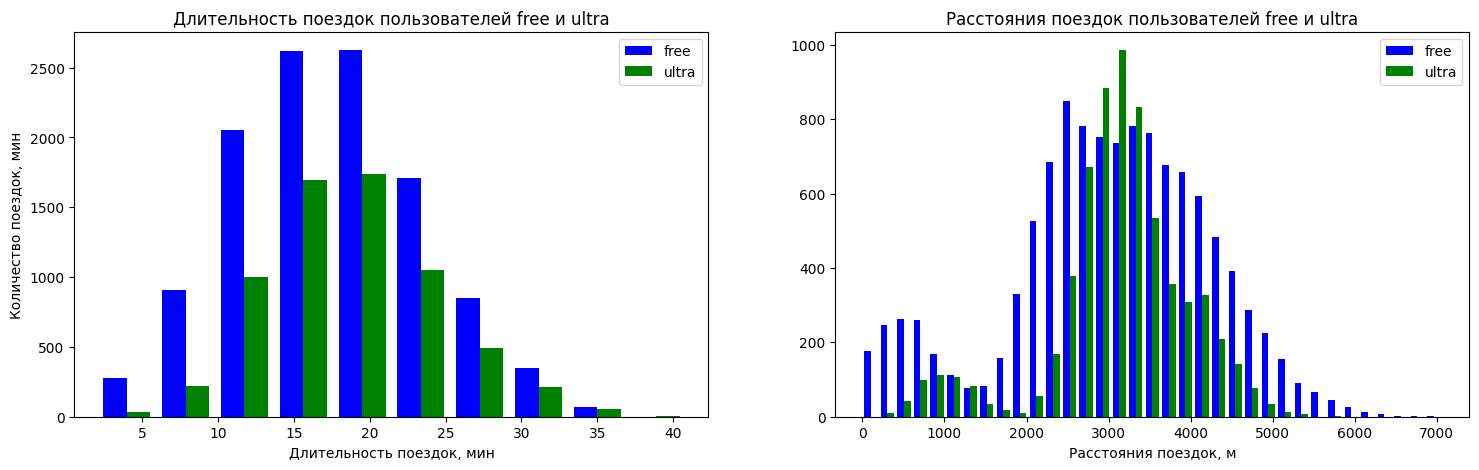

In [29]:
free_du = data_free['duration']
ultra_du = data_ultra['duration']    

free_di = data_free['distance']
ultra_di = data_ultra['distance']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,5))

colors = ['blue', 'green']
names = ['free', 'ultra']

ax1.hist([free_du, ultra_du], color=colors, label=names);
ax1.set_title('Длительность поездок пользователей free и ultra')
ax1.legend()
ax1.set_xlabel('Длительность поездок, мин')
ax1.set_ylabel('Количество поездок, мин');

ax2.hist([free_di, ultra_di], bins=35, color=colors, label=names);
ax2.set_title("Расстояния поездок пользователей free и ultra")
ax2.set_xlabel('Расстояния поездок, м')
ax2.legend()

plt.show()

*Вывод: Из первой гистограмы видно, что пользователи категории free намного чаще используют сервис для коротких поездок(в 4-3-2 раза на поездках до 10 минут). С возрастанием длительности поездки эта разница снижается. Количество 35 минутных поездок уже почти одинаково для обоих категорий. Хотя стоит учесть, что пользователей без подписки (free) в целом больше. Из второй гистограмы видна разница на коротких поездках, пользователи с подпиской реже использую самокаты на короткие поездки до 500 м. и почти не используют на расстояния 2 км. Это отчасти подтверждает версию, что в этой области находятся в основном первые поездки пользователей. ТОлько на расстояния 2.8- 3.2 км пользователи с подпиской катаются чаще, чем пользователи без подписки.*

## Шаг 5. Подсчёт выручки

In [30]:
#Округляем длительность поездок до целых минут
data_un['duration'] = np.ceil(data_un['duration']) 

In [31]:
#группируем данные по id пользователя и месяцу, считаем сумму расстояний и время поездок и количество поездок
data_grouped = data_un.groupby(['user_id', 'month', 'subscription_type']).agg(
                        {'distance': ['sum'], 'duration': ['sum', 'count']})
data_grouped.columns = ['distance', 'duration', 'count']
data_grouped.head()

distance  duration  count
user_id month subscription_type                              
1       1     ultra              7027.511294      42.0      2
        4     ultra               754.159807       7.0      1
        8     ultra              6723.470560      46.0      2
        10    ultra              5809.911100      32.0      2
        11    ultra              7003.499363      56.0      3

In [32]:
users_group = data_grouped.reset_index()
users_group.head()

,user_id,month,subscription_type,distance,duration,count
0,1,1,ultra,7027.511294,42.0,2
1,1,4,ultra,754.159807,7.0,1
2,1,8,ultra,6723.470560,46.0,2
3,1,10,ultra,5809.911100,32.0,2
4,1,11,ultra,7003.499363,56.0,3


In [33]:
#Создаем функцию для подсчета стоимости поездок за месяц 
#в зависимости от типа подписки
def payment(row):
    subscription = row['subscription_type']
    duration = row['duration']
    count = row['count']
    
    if subscription == 'free':
        return 50*count + 8*duration
    if subscription == 'ultra':
        return 199 + 6*duration
users_group['payment'] = users_group.apply(payment, axis=1)

users_group.head()

,user_id,month,subscription_type,distance,duration,count,payment
0,1,1,ultra,7027.511294,42.0,2,451.0
1,1,4,ultra,754.159807,7.0,1,241.0
2,1,8,ultra,6723.470560,46.0,2,475.0
3,1,10,ultra,5809.911100,32.0,2,391.0
4,1,11,ultra,7003.499363,56.0,3,535.0


## Шаг 6. Проверка гипотез

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки. Нулевая гипотеза: пользователи с подпиской тратят столько же времени на поездки сколько пользователи без подписки. Альтернативная гипотеза:Пользователи с подпиской тратят больше времени на поездки.

In [34]:
ultra_values = data_ultra['duration']
free_values = data_free['duration']

alpha = 0.05

results = st.ttest_ind(
    ultra_values, 
    free_values,
      alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 4.7044680744539e-28
Отвергаем нулевую гипотезу


Вероятность что случайная поездка пользователя с подпиской дольше поездки пользователя без подписки выше уровня значимости.

6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы. Нулевая гипотеза: расстояние равно 3130 м, а альтернативная гипотеза - расстояние меньше 3130 метров.

In [35]:
optimal_value = 3130
ultra_distance = data_ultra['distance']

alpha = 0.05

results = st.ttest_1samp(
    ultra_distance, 
    optimal_value,
      alternative='less')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.08046311521502145
Не отвергаем нулевую гипотезу


Нельзя утверждать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод. Проверяем гипотезу о равенстве двух генеральных совокупностей, представленных двумя независимыми выборками. Альтернативная гипотеза: ежемесячная выручка подписчиков выше, чем пользователей без подписки.

In [36]:
 #выручка пользователей с подпиской
sample_ultra = users_group.loc[users_group['subscription_type'] == "ultra",
                               'payment']
#выручка пользователей без подписки
sample_free = users_group.loc[users_group['subscription_type'] == "free", 
                              'payment']    
#sample_ultra                            

alpha = 0.05 
                                
results = st.ttest_ind(sample_ultra, sample_free, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.0314113674863288e-30
Отвергаем нулевую гипотезу


Ежемесячная выручка подписчиков выше, чем пользователей без подписки

6.4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?
Ответ: Нужно использовать тест о двух зависимых выборках: ttest_rel()

## Шаг 7. Распределения

7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соотвествующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10% пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

C:\Users\n.feoktistova\AppData\Local\Continuum\anaconda3\envs\practicum\lib\site-packages\scipy\stats\_discrete_distns.py:69: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


0.4734009187048347

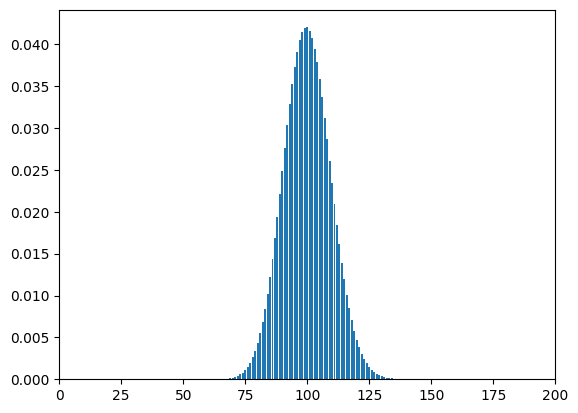

In [37]:
#целевое количество клиентов: 100
p = 0.1 # вероятность продления подписки
n = 1000 # количество промокодов 
        #(допустим что каждый десятый участник промоакции продлит подписку)


distr = [] 
#используем биномиальное распределение
for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p)
    distr.append(current_value)
#построим гистограмму распределения вероятностей    
plt.bar(range(0, n+1), distr);
plt.xlim(0,200)
# вероятность получить ровно 100 клиентов раздав 1000 промокодов
#prob1 = binom.pmf(k= 100 , n= 1000 , p= 0.1)

#вероятность что больше ста клиентов  из 1000 продлят подписку
prob2 = 1 - binom.cdf(k= 100 , n= 1000 , p= 0.1 )
prob2

Раздав 1000 промокодов вероятность получить минимум 100 клиентов 0,47. Нам нужно чтобы эта вероятность была 0,95, увеличим число промокодов.

0.9504520478979693

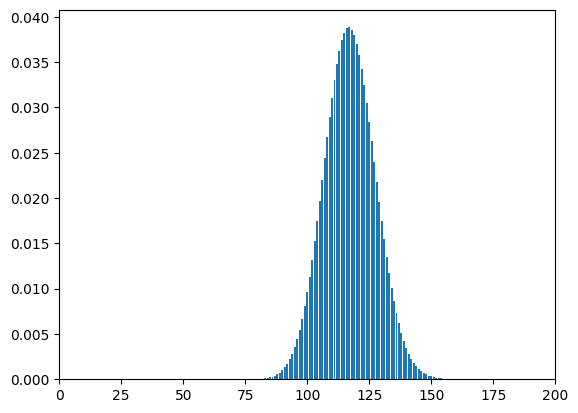

In [38]:
#целевое количество клиентов: 100
p = 0.1 # вероятность продления подписки
n = 1172 # количество промокодов (пробуем увеличивать и смотрим на результат prob2)

distr = [] 
#используем биномиальное распределение
for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p)
    distr.append(current_value)
#построим гистограмму распределения вероятностей    
plt.bar(range(0, n+1), distr);
plt.xlim(0,200)
# вероятность получить ровно 100 клиентов раздав 1000 промокодов
#prob1 = binom.pmf(k= 100 , n= 1000 , p= 0.1 )
#вероятность что больше ста клиентов  из 1172 продлят подписку
prob2 = 1 - binom.cdf(k= 100 , n= 1172 , p= 0.1 )
prob2

Результат: увеличив число промокодов с первоначального значения (1000) всего на 172 штуки, вероятность продления подписки минимум 100 пользователей выросла с 0,47 до 0,95%. Минимальное количество промокодов: 1172.

7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40% получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более более 399,5 тыс. пользователей.

Вероятность получить не более 399,5 тысяч прочитаных уведомлений: 15.4%


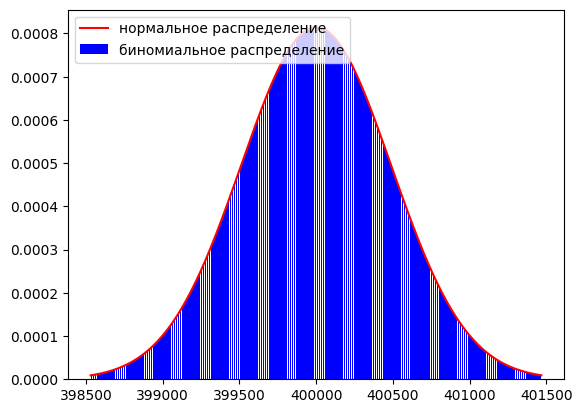

In [39]:
# задаём параметры биномиального распределения
p = 0.4 # вероятность открывания уведомления
n = 1000000 # количество уведомлений

#задаем границы для построения графика
left = int(n * p - 3 * sqrt(n * p * (1 - p)))
right = int(n * p + 3 * sqrt(n * p * (1 - p)))
x = list(range(max(0, left), right))

# задаём параметры нормального распределения (матожидание и стандартное отклонение), по данным биномиального:
mu = n * p
sigma = sqrt(n * p * (1 - p))
distr = st.norm(mu, sigma) 

ax = plt.subplot()

ax.plot(x, norm.pdf(x, mu, sigma), label='нормальное распределение', color='red')
ax.bar(x, binom.pmf(x, n, p), label= 'биномиальное распределение', color='blue')
ax.legend()

result = distr.cdf(399500)
print('Вероятность получить не более 399,5 тысяч прочитаных уведомлений:', "{:.1%}".format(result))

#### Вывод

Проведена предварительная обработка данных. Удалены дубликаты (31 строки), и аномальные значения времени поездок (95строк). Пользователей без платной подписки на 8,8% больше чем без. Самый популярный возраст пользователей - 25 лет. Самому взрослому пользователю всего 43 года, а самому юному - 12 лет. Длительность поездок пользователей распределена нормально. Судя по гистограме расстояний можно выделить категорию коротких поездок до 1,5 км, возможно, пробных, большая же часть поездок от 2,5 км до 4 км. Среднее расстояние и медиана в районе 3,1 км,а среднее время поездки 17 минут. Дольше 35 минут почти не катаются.
Исследовательский анализ данных показал, что пользователи категории free намного чаще используют сервис для коротких поездок(в 4-3-2 раза на поездках до 10 минут). С возрастанием длительности поездки эта разница снижается. Количество 35 минутных поездок уже почти одинаково для обоих категорий. Хотя стоит учесть, что пользователей без подписки (free) в целом больше. Пользователи с подпиской реже использую самокаты на короткие поездки до 500 м. и почти не используют на расстояния 2 км. Это отчасти подтверждает версию, что в этой области находятся в основном первые поездки пользователей. ТОлько на расстояния 2.8- 3.2 км пользователи с подпиской катаются чаще, чем пользователи без подписки.
    Были проверены гипотезы:
- тратят ли пользователи с подпиской больше времени на поездки? Гипотеза подтвердилась.
- можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Гипотеза не подтвердилась.
- помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Гипотеза подтвердилась.

Выяснили, что минимальное количество промокодов которые нужно разослать, чтобы вероятность не выполнить план по новым подписчикам была примерно 5% - 1172.
Вероятность того, что разослав 1 млн push-уведомлений и их откроют более 399,5 тыс. пользователей 15,4 %.